## Exploratory Data Visualization

In [7]:
import sqlite3
import pandas.io.sql as sql
import pandas as pd
import seaborn as sns
import geopandas as gdp
from shapely.geometry import Point,Polygon
import csv
import matplotlib.pyplot as plt
import gmaps

### Using SQL Querying & Data Storage

In [8]:
#A script to create and import a .csv into sqlite3
'''con = sqlite3.connect("bikeshare.db")
cur = con.cursor()
cur.execute("CREATE TABLE bike_share (id INTEGER PRIMARY KEY,duration_sec int64(50),"
            "start_time datetime,end_time datetime,start_station_id int64,start_station_name varchar(255),start_station_latitude float(1,10),start_station_longitude float(1,10),end_station_id int64(50),end_station_name varchar(255),end_station_latitude float(1,10),end_station_longitude float(1,10),bike_id int64,user_type varchar(255),member_birth_year int,member_gender varchar(255),bike_share_for_all_trip varchar(255) );")

with open('201908-baywheels-tripdata.csv','r', encoding='utf-8') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['duration_sec'],i['start_time'],i['end_time'],i['start_station_id'],i['start_station_name'],i['start_station_latitude'],i['start_station_longitude'],i['end_station_id'],i['end_station_name'],i['end_station_latitude'],i['end_station_longitude'],i['bike_id'],i['user_type'],i['member_birth_year'],i['member_gender'],i['bike_share_for_all_trip']) for i in dr]

cur.executemany("INSERT INTO bike_share (duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);", to_db)
con.commit()'''

'con = sqlite3.connect("bikeshare.db")\ncur = con.cursor()\ncur.execute("CREATE TABLE bike_share (id INTEGER PRIMARY KEY,duration_sec int64(50),"\n            "start_time datetime,end_time datetime,start_station_id int64,start_station_name varchar(255),start_station_latitude float(1,10),start_station_longitude float(1,10),end_station_id int64(50),end_station_name varchar(255),end_station_latitude float(1,10),end_station_longitude float(1,10),bike_id int64,user_type varchar(255),member_birth_year int,member_gender varchar(255),bike_share_for_all_trip varchar(255) );")\n\nwith open(\'201908-baywheels-tripdata.csv\',\'r\', encoding=\'utf-8\') as fin: # `with` statement available in 2.5+\n    # csv.DictReader uses first line in file for column headings by default\n    dr = csv.DictReader(fin) # comma is default delimiter\n    to_db = [(i[\'duration_sec\'],i[\'start_time\'],i[\'end_time\'],i[\'start_station_id\'],i[\'start_station_name\'],i[\'start_station_latitude\'],i[\'start_station_long

<p>Let&rsquo;s check all of our data run a query and see if we have any duplicated user ID&rsquo;s</p>

In [9]:
#Query all of our data
con = sqlite3.connect("bikeshare.db")
df = sql.read_sql('SELECT * from bike_share', con)
df

,id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1,68145,2019-08-31 21:27:42.2530,2019-09-01 16:23:27.4920,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,,,No
1,2,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,1993,Female,No
2,3,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,1995,Male,No
3,4,75682,2019-08-31 14:22:02.2780,2019-09-01 11:23:24.5110,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,1993,Female,No
4,5,30849,2019-08-31 18:47:08.0570,2019-09-01 03:21:17.6970,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210558,210559,728,2019-08-01 00:07:37.0390,2019-08-01 00:19:45.7760,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2500,Subscriber,1983,Male,No
210559,210560,761,2019-08-01 00:06:23.8300,2019-08-01 00:19:05.5500,151,53rd St at Hollis St,37.836182,-122.287180,159,24th St at Market St,37.816060,-122.278244,613,Subscriber,1982,Female,No
210560,210561,331,2019-08-01 00:08:28.7570,2019-08-01 00:14:00.1350,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,62,Victoria Manalo Draves Park,37.777791,-122.406432,2904,Subscriber,1994,Male,No
210561,210562,111,2019-08-01 00:11:02.5820,2019-08-01 00:12:54.1340,183,Telegraph Ave at 19th St,37.808702,-122.269927,180,Telegraph Ave at 23rd St,37.812678,-122.268773,1910,Subscriber,1993,Male,No


In [10]:
#Check distinct ID
con = sqlite3.connect("bikeshare.db")
dupes = sql.read_sql('SELECT DISTINCT id from bike_share ', con)
dupes

,id
0,1
1,2
2,3
3,4
4,5
...,...
210558,210559
210559,210560
210560,210561
210561,210562


After doing a check we know there are no duplicated records both queries match (210563) rows

In [11]:
#Checking our data types
df.dtypes

id                           int64
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year           object
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [12]:
#Check the shape of the data
df.shape

(210563, 17)

In [13]:
#Fix the timestamp issue when converting to pandas.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.dtypes

id                                  int64
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                  object
member_gender                      object
bike_share_for_all_trip            object
dtype: object

<p>Run a query where birth_year is not null I want to explore the data based on gender.</p>

In [14]:
#Query the data where birth_year not null
birth = sql.read_sql('SELECT * from bike_share where member_birth_year != "" ', con)
birth

,id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,2,53216,2019-08-31 22:34:17.5120,2019-09-01 13:21:13.9310,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,1993,Female,No
1,3,53182,2019-08-31 22:34:49.9420,2019-09-01 13:21:12.4570,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,1995,Male,No
2,4,75682,2019-08-31 14:22:02.2780,2019-09-01 11:23:24.5110,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,1993,Female,No
3,7,8959,2019-08-31 22:44:38.2130,2019-09-01 01:13:57.2480,323,Broadway at Kearny,37.798014,-122.405950,8,The Embarcadero at Vallejo St,37.799953,-122.398525,3028,Customer,1970,Female,No
4,11,1624,2019-08-31 23:55:17.3900,2019-09-01 00:22:22.1320,276,Julian St at The Alameda,37.332233,-121.912516,276,Julian St at The Alameda,37.332233,-121.912516,10567,Subscriber,1969,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170769,210559,728,2019-08-01 00:07:37.0390,2019-08-01 00:19:45.7760,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,2500,Subscriber,1983,Male,No
170770,210560,761,2019-08-01 00:06:23.8300,2019-08-01 00:19:05.5500,151,53rd St at Hollis St,37.836182,-122.287180,159,24th St at Market St,37.816060,-122.278244,613,Subscriber,1982,Female,No
170771,210561,331,2019-08-01 00:08:28.7570,2019-08-01 00:14:00.1350,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,62,Victoria Manalo Draves Park,37.777791,-122.406432,2904,Subscriber,1994,Male,No
170772,210562,111,2019-08-01 00:11:02.5820,2019-08-01 00:12:54.1340,183,Telegraph Ave at 19th St,37.808702,-122.269927,180,Telegraph Ave at 23rd St,37.812678,-122.268773,1910,Subscriber,1993,Male,No


<p><strong>Question:</strong></p>
<p>What genders are using the bike share program most?</p>

In [15]:
#Query our data and store it into a pandas dataframe
gender = sql.read_sql('SELECT member_gender, COUNT(member_gender) as count FROM bike_share WHERE member_gender !="" GROUP BY member_gender ORDER BY COUNT(member_gender) DESC', con)
gender

,member_gender,count
0,Male,128285
1,Female,40054
2,Other,2438


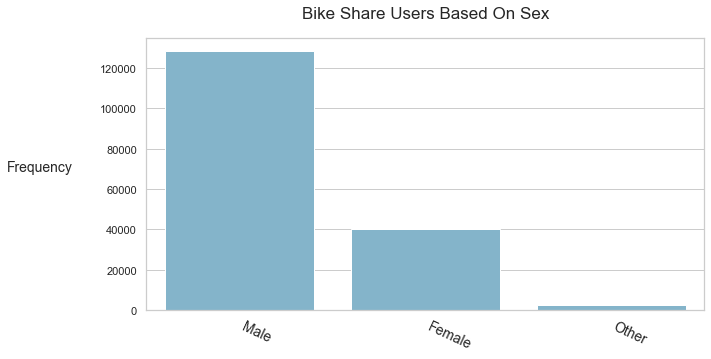

In [16]:
#create our bar chart and save it as a function
def sex():
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="whitegrid")
    
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="member_gender", y="count", data=gender,label="Total", color="#79B8D5")
    
    plt.xlabel('')
    plt.ylabel('Frequency',rotation=0,fontsize=14,labelpad=60)
    plt.title("Bike Share Users Based On Sex",fontsize=17,pad=20);
    plt.xticks(rotation=-25,fontsize=14,ha='left');
    return plt.show()

sex()

<p><strong>Observation:</strong></p>
<p>Our population of users is predominantly male by a wide margin.</p>

<p><strong>Question:</strong></p>
<p>How many subscribed users do we have vs customers?</p>

In [17]:
#Query our data and store it into a pandas dataframe
user = sql.read_sql('SELECT user_type, COUNT(user_type) as count FROM bike_share WHERE user_type !="" GROUP BY user_type ORDER BY COUNT(user_type) DESC', con)
user

,user_type,count
0,Subscriber,164928
1,Customer,45635


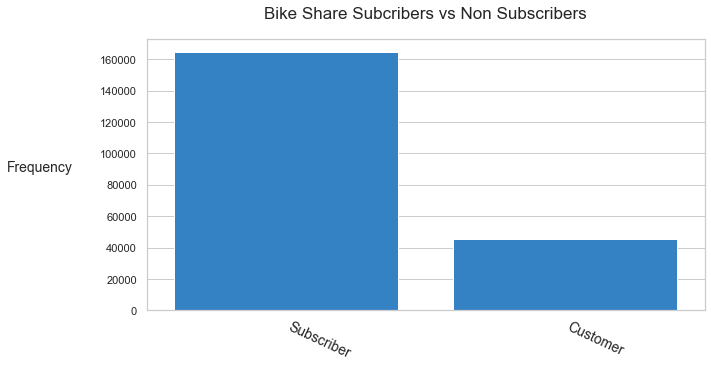

In [18]:
#create our bar chart and save it as a function.
def users():
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="whitegrid")
    
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="user_type", y="count", data=user,label="Total", color="#1C84DB")
    
    plt.xlabel('')
    plt.ylabel('Frequency',rotation=0,fontsize=14,labelpad=60)
    plt.title("Bike Share Subcribers vs Non Subscribers",fontsize=17,pad=20)
    plt.xticks(rotation=-25,fontsize=14,ha='left');
    return plt.show()

users()

<p><strong>Observation:</strong></p>
<p>A large majority of our population has subscribed to the bike share program.</p>

<p><strong>Question:</strong></p>
<p>What are the top 20 bikes are being used the most?</p>

In [19]:
#Query our data and store it into a pandas dataframe
pop_bike = sql.read_sql('SELECT bike_id, COUNT(bike_id) as count FROM bike_share WHERE bike_id !="" GROUP BY bike_id ORDER BY COUNT(bike_id) DESC', con)
pop_bike20 = pop_bike.head(20)
pop_bike20

,bike_id,count
0,9477,175
1,3028,166
2,9467,166
3,1124,162
4,3589,159
5,1624,156
6,954,153
7,9555,152
8,3089,150
9,3386,149


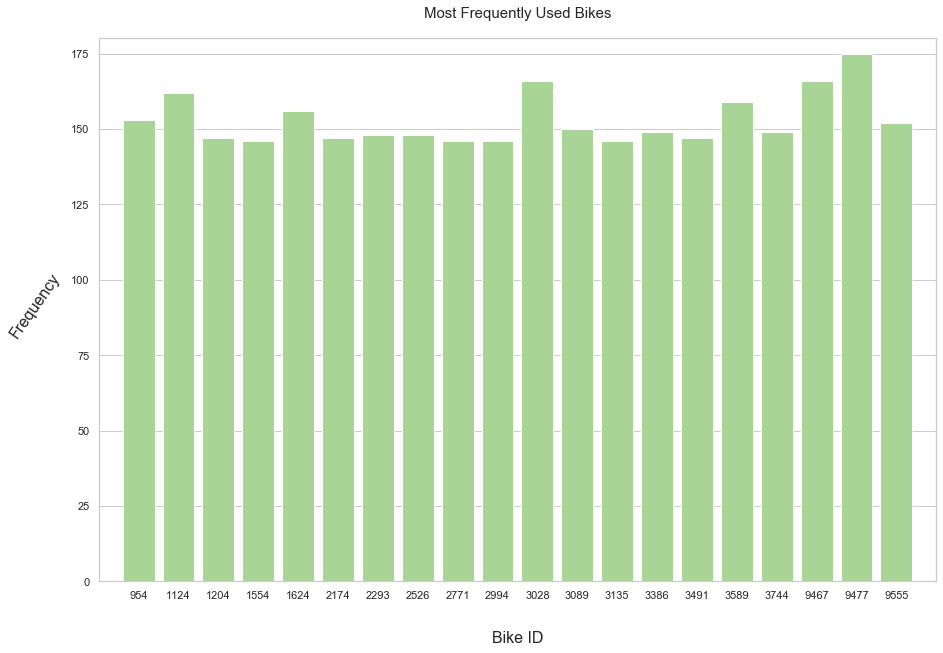

In [20]:
#create our bar chart
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="bike_id", y="count", data=pop_bike20,label="Total", color="#A4DF8C")

plt.xlabel('Bike ID',fontsize=16,labelpad=30)
plt.ylabel('Frequency',rotation=55,fontsize=16,labelpad=30)
plt.title('Most Frequently Used Bikes',fontsize=15,pad=20)
plt.margins(0.03)
#plt.savefig('name_here')

<p><strong>Observation:</strong></p>
<p>The top 20 bikes are being used relatively even with a few outliers.</p>

<p><strong>What other visuals are we able to extract from our data?</strong></p>

In [21]:
#Call our dataframe
df.head()

,id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1,68145,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,,,No
1,2,53216,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,1993,Female,No
2,3,53182,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,1995,Male,No
3,4,75682,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,1993,Female,No
4,5,30849,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,,,No


Let’s make some histograms and scatter plots for areas of interest.

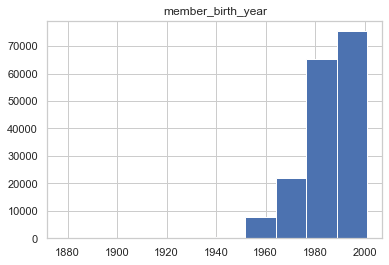

In [22]:
#Age group using the bike share program
birth.hist(column='member_birth_year');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


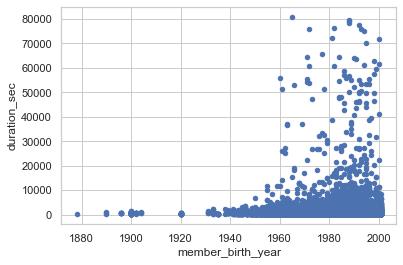

In [23]:
#Age group using the bike share program
birth.plot(kind='scatter', x='member_birth_year', y='duration_sec');

<p>Observation:</p>
<li>According to the histogram and scatter plot we can state that the younger generation is using the program more frequently.</li>
<li>Looks like some of the data is inaccurate. It is highly unlikely that people born in 1880 are using the program.</li>

<p><strong>Question:</strong></p>
<p>What bikes are being used this most?</p>

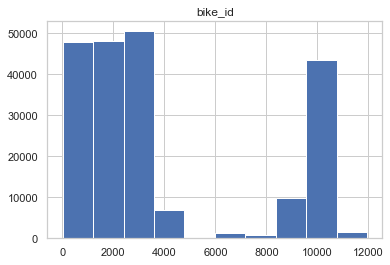

In [24]:
#Which bikes are being used the most?
df.hist(column='bike_id');

<p><strong>Observation:</strong></p>
<p>This gives us a rough idea however further investigation is needed.</p>

<p><strong>Question:</strong></p>
<p>What is the relationship between bike_id and duration_sec?</p>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


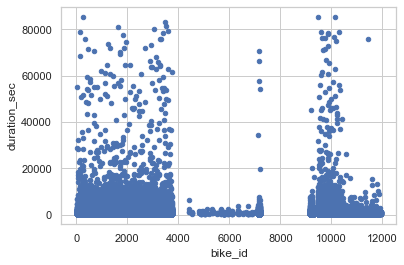

In [25]:
#How long are bikes being used?
df.plot(kind='scatter', x='bike_id', y='duration_sec');

<p><strong>Observation:</strong></p>
<p>This gives us a rough idea however further investigation is needed.</p>

<p><strong>Question:</strong></p>
<p>Which start stations are being used the most?</p>

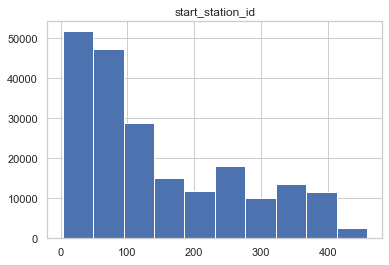

In [26]:
#What beginning stations are popular?
df.hist(column='start_station_id');

<p><strong>Observation:</strong></p>
<ul>
<li>The data is skewed left meaning the lower start station ID's are being used more frequently.</li>
<li>This gives us a rough idea however further investigation is needed.</li>
</ul>

<p><strong>Question:</strong></p>
<p>What is the relationship between our start stations and birth year?</p>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


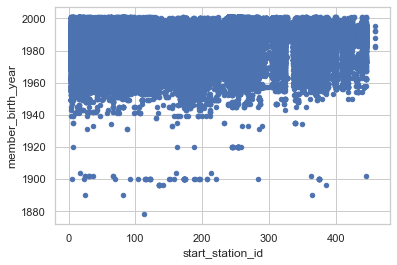

In [27]:
#Start station vs member birth year
birth.plot(kind='scatter', x='start_station_id', y='member_birth_year');

<p><strong>Observation:</strong></p>
<p>More investigation is needed.</p>

<p><strong>Question:</strong></p>
<p>Which end stations are being used the most?</p>

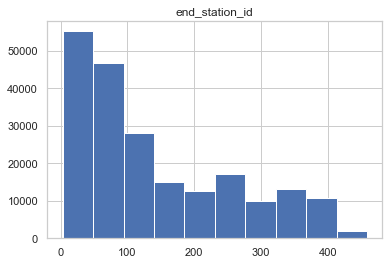

In [28]:
#End station hist
df.hist(column='end_station_id');

<p><strong>Observation:</strong></p>
<ul>
<li>The data is skewed left meaning the lower start station ID's are being used more frequently.</li>
<li>This gives us a rough idea however further investigation is needed.</li>
</ul>

<p><strong>Question:</strong></p>
<li>What are the most popular start stations top 5?</li>
<li>What are the least popular start stations top 5?</li>

In [29]:
#Query our data and store it into a pandas dataframe
station = sql.read_sql('SELECT start_station_name, COUNT(start_station_name) as count FROM bike_share WHERE start_station_name !="" GROUP BY start_station_name ORDER BY COUNT(start_station_name) DESC', con)
pop_station = station.head(5)
unpop_station = station.tail(5)

In [30]:
#popular stations
bar_pop_station = pop_station
bar_pop_station

,start_station_name,count
0,San Francisco Caltrain Station 2 (Townsend St...,5196
1,Berry St at 4th St,4156
2,San Francisco Ferry Building (Harry Bridges Pl...,3714
3,Market St at 10th St,3543
4,Montgomery St BART Station (Market St at 2nd St),3092


In [31]:
#unpopular stations
bar_unpop_station = unpop_station
bar_unpop_station

,start_station_name,count
372,Utah St at 24th St,11
373,1st St at Younger Ave,8
374,21st Ave at International Blvd,7
375,MTL-ECO5-01,3
376,16th St Depot,2


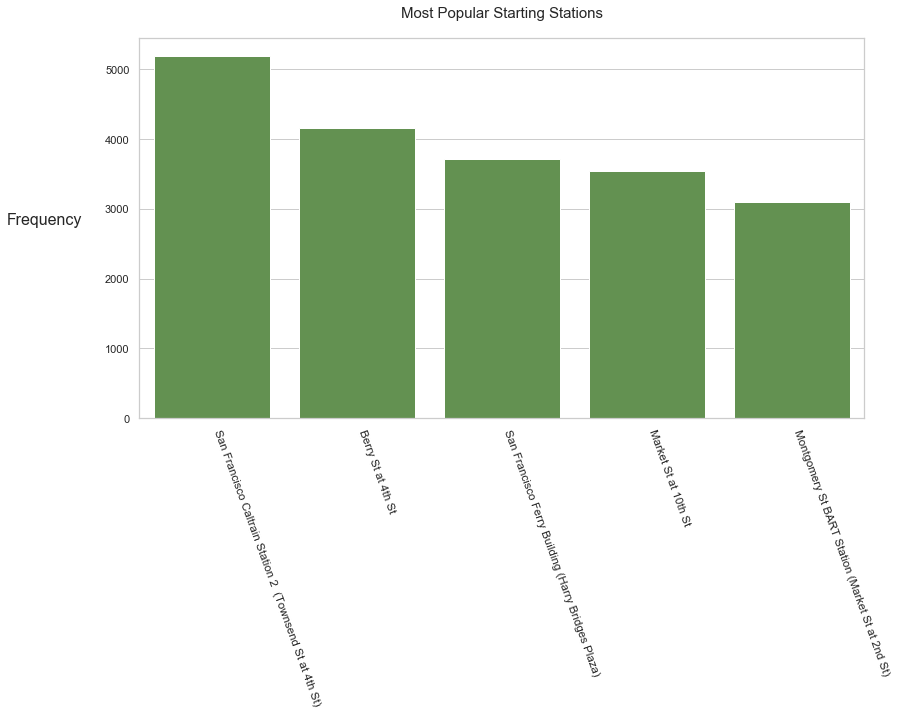

In [32]:
def bar_pop_start_station():
    
    #create our bar chart for our most popular start stations.
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(13, 7))

    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="start_station_name", y="count", data=bar_pop_station, label="Total", color="#5F9C46")

    plt.xlabel('')
    plt.ylabel('Frequency',rotation=0,fontsize=16,labelpad=60)
    plt.title("Most Popular Starting Stations",fontsize=15,pad=20)
    plt.xticks(rotation=-70,fontsize=11.5,ha='left');
    return plt.show()

bar_pop_start_station()

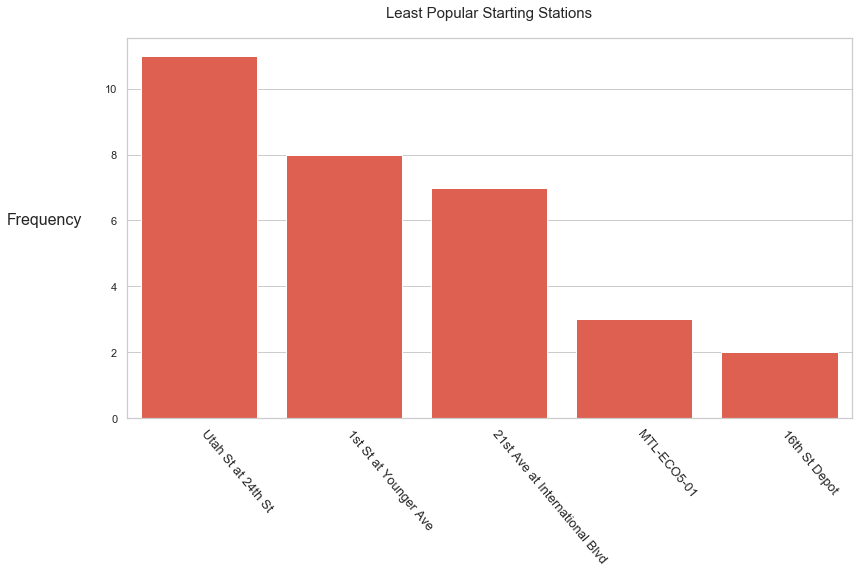

In [33]:
def bar_least_pop():
    
    #create our bar chart
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(13, 7))
    
    # Plot the total crashes
    sns.set_color_codes("pastel")
    sns.barplot(x="start_station_name", y="count", data=bar_unpop_station, label="Total", color="#F54E3A")
    
    plt.xlabel('')
    plt.ylabel('Frequency',rotation=0,fontsize=16,labelpad=60)
    plt.title("Least Popular Starting Stations",fontsize=15,pad=20)
    plt.xticks(rotation=-50,fontsize=13,ha='left')
    return plt.show();
bar_least_pop()

<p><strong>Observation:</strong></p>
<ul>
<li>We notice there is a huge difference in usage between are most popular and least popular stations.</li>
</ul>

In [34]:
#View our data.
df.head()

,id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1,68145,2019-08-31 21:27:42.253,2019-09-01 16:23:27.492,249,Russell St at College Ave,37.858473,-122.253253,247,Fulton St at Bancroft Way,37.867789,-122.265896,3112,Customer,,,No
1,2,53216,2019-08-31 22:34:17.512,2019-09-01 13:21:13.931,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,2440,Customer,1993,Female,No
2,3,53182,2019-08-31 22:34:49.942,2019-09-01 13:21:12.457,368,Myrtle St at Polk St,37.785434,-122.419622,78,Folsom St at 9th St,37.773717,-122.411647,9743,Customer,1995,Male,No
3,4,75682,2019-08-31 14:22:02.278,2019-09-01 11:23:24.511,104,4th St at 16th St,37.767045,-122.390833,126,Esprit Park,37.761634,-122.390648,11418,Subscriber,1993,Female,No
4,5,30849,2019-08-31 18:47:08.057,2019-09-01 03:21:17.697,327,5th St at San Salvador St,37.332039,-121.881766,327,5th St at San Salvador St,37.332039,-121.881766,1553,Customer,,,No


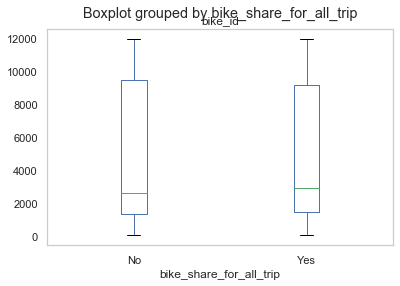

In [35]:
#make a box plot I am not really interested in this data
df.boxplot(by ='bike_share_for_all_trip', column =['bike_id'], grid = False) ;

In [36]:
#Let's Check what other variables we can work with.
df.describe()

,id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,210563.000000,210563.00000,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000,210563.000000
mean,105282.000000,833.51472,144.829481,37.770058,-122.354407,140.921145,37.770268,-122.353604,4048.755897
std,60784.446703,1928.22378,120.128023,0.102810,0.217648,118.990674,0.102675,0.217245,3639.124465
min,1.000000,61.00000,3.000000,37.311284,-122.473658,3.000000,37.311284,-122.473658,12.000000
25%,52641.500000,376.00000,50.000000,37.770407,-122.412408,44.000000,37.770407,-122.411306,1312.000000
50%,105282.000000,593.00000,104.000000,37.780526,-122.398285,99.000000,37.780787,-122.397437,2629.000000
75%,157922.500000,914.00000,240.000000,37.795393,-122.294837,233.000000,37.797280,-122.294837,9241.000000
max,210563.000000,85492.00000,459.000000,45.510000,-73.570000,459.000000,45.510000,-73.570000,11945.000000


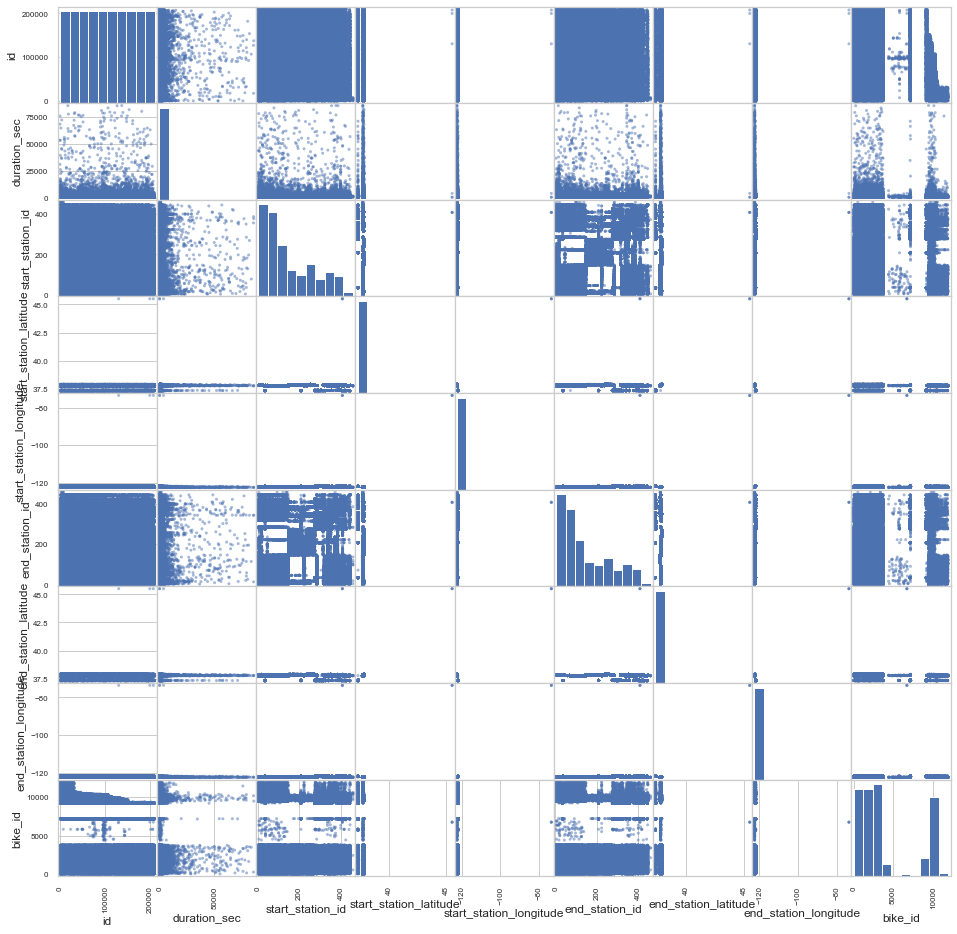

In [96]:
#creating a matrix to give us some ideas of what we could potentially plot.
pd.plotting.scatter_matrix(df, figsize=(16,16));
#df.iloc[:, 0:2]

In [37]:
#pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde');
#plt.show()

### <p>Observations within the scatter matrix:</p>
<ol>
<li>Member birth year is skewed right suggesting users are millennials and the younger generation are majority users of the program.</li>
</ol>
<ul>
<li>Which age group is most prominent?</li>
<li>What start stations are they using?</li>
<li>What end stations are they using?</li>
<li>Who uses the bike sharing more men vs women?</li>
</ul>
<p>I am more interested in the geographical data so I will continue to explore that.</p>

### Let’s take a look at where our bike share locations are on a map.

In [38]:
#Query of our data
con = sqlite3.connect("bikeshare.db")
locations_df = sql.read_sql('SELECT DISTINCT start_station_id, start_station_longitude, start_station_latitude from bike_share', con)
locations_df

,start_station_id,start_station_longitude,start_station_latitude
0,249,-122.253253,37.858473
1,368,-122.419622,37.785434
2,104,-122.390833,37.767045
3,327,-121.881766,37.332039
4,49,-122.394989,37.780760
...,...,...,...
372,391,-121.904436,37.355030
373,421,-121.878778,37.360001
374,344,-122.396292,37.766349
375,408,-73.570000,45.510000


<p>There is a way to use shape files for geographic plots. I sourced a few from open data resources.</p>

In [39]:
#Read in our shape file
bay_area = gdp.read_file('shape/s7jc7v.shp')

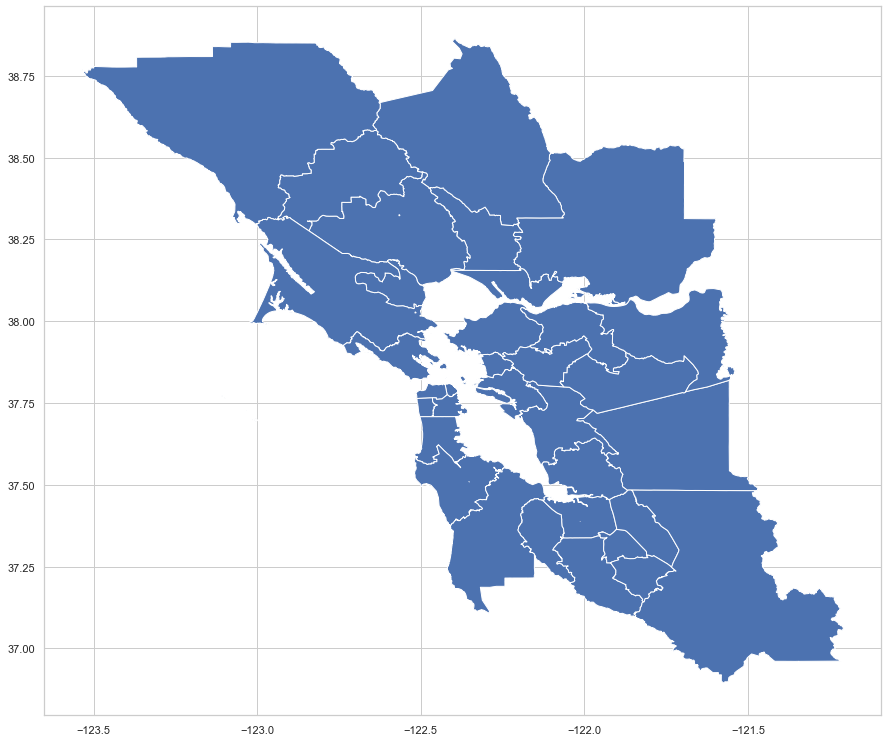

In [40]:
#Plot the shape file
fig,ax = plt.subplots(figsize = (15,15))
bay_area.plot(ax = ax);

In [41]:
#read in some training data run a loop to Populate another column for our geometry library. 
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(locations_df["start_station_longitude"], locations_df["start_station_latitude"])]

locations_df = gdp.GeoDataFrame(locations_df,#Specify our data
                                crs = crs,#specify our coordinate reference system
                                geometry = geometry)#Specify the geometry list we created

locations_df

,start_station_id,start_station_longitude,start_station_latitude,geometry
0,249,-122.253253,37.858473,POINT (-122.2532529 37.8584732)
1,368,-122.419622,37.785434,POINT (-122.4196216464043 37.78543382786823)
2,104,-122.390833,37.767045,POINT (-122.3908334970474 37.76704457969368)
3,327,-121.881766,37.332039,POINT (-121.8817663192749 37.33203868095132)
4,49,-122.394989,37.780760,POINT (-122.3949894 37.7807601)
...,...,...,...,...
372,391,-121.904436,37.355030,POINT (-121.9044363498688 37.3550295822529)
373,421,-121.878778,37.360001,POINT (-121.8787783384323 37.3600013909666)
374,344,-122.396292,37.766349,POINT (-122.3962917923927 37.76634858593739)
375,408,-73.570000,45.510000,POINT (-73.56999999999999 45.51)


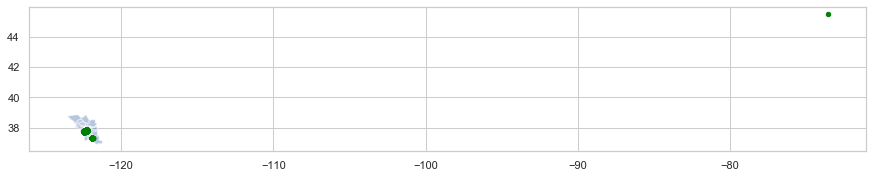

In [42]:
#Plot our data
fig,ax = plt.subplots(figsize = (15,15))
bay_area.plot(ax = ax, alpha = 0.4)

locations_df.plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "",alpha=0.99);
#plt.legend(prop={'size': 15})

<p><strong>Observations:</strong></p>
<p>There seems to be a problem with false geo data from some of our users.</p>
<ul>
<li>We'll filter out coordinates that are above -120</li>
</ul>

In [43]:
#Query our data and filter out undesired data
con = sqlite3.connect("bikeshare.db")
locations_df = sql.read_sql('SELECT DISTINCT start_station_id, start_station_longitude, start_station_latitude from bike_share where start_station_longitude <= -120 ', con)
locations_df

,start_station_id,start_station_longitude,start_station_latitude
0,249,-122.253253,37.858473
1,368,-122.419622,37.785434
2,104,-122.390833,37.767045
3,327,-121.881766,37.332039
4,49,-122.394989,37.780760
...,...,...,...
371,224,-122.239305,37.784855
372,391,-121.904436,37.355030
373,421,-121.878778,37.360001
374,344,-122.396292,37.766349


In [44]:
#read in some training data run a loop to Populate another column for our geometry library. 
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(locations_df["start_station_longitude"], locations_df["start_station_latitude"])]

locations_df = gdp.GeoDataFrame(locations_df,#Specify our data
                                #crs = crs,#specify our coordinate reference system
                                geometry = geometry)#Specify the geometry list we created

locations_df

,start_station_id,start_station_longitude,start_station_latitude,geometry
0,249,-122.253253,37.858473,POINT (-122.2532529 37.8584732)
1,368,-122.419622,37.785434,POINT (-122.4196216464043 37.78543382786823)
2,104,-122.390833,37.767045,POINT (-122.3908334970474 37.76704457969368)
3,327,-121.881766,37.332039,POINT (-121.8817663192749 37.33203868095132)
4,49,-122.394989,37.780760,POINT (-122.3949894 37.7807601)
...,...,...,...,...
371,224,-122.239305,37.784855,POINT (-122.2393047809601 37.78485466229441)
372,391,-121.904436,37.355030,POINT (-121.9044363498688 37.3550295822529)
373,421,-121.878778,37.360001,POINT (-121.8787783384323 37.3600013909666)
374,344,-122.396292,37.766349,POINT (-122.3962917923927 37.76634858593739)


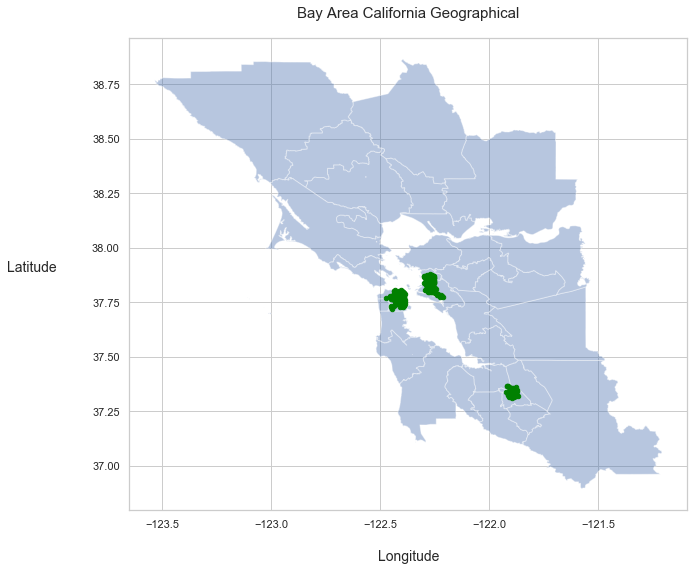

In [45]:
def bay_area_map():
    
    fig,ax = plt.subplots(figsize = (10,10))
    bay_area.plot(ax = ax, alpha = 0.4)
    
    locations_df.plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "Bike Share Locations",alpha=0.99)
    
    plt.xlabel('Longitude',rotation=0,fontsize=14,labelpad=20)
    plt.ylabel('Latitude',rotation=0,fontsize=14,labelpad=60)
    plt.title('Bay Area California Geographical',fontsize=15,pad=20)
    return plt.show()

bay_area_map()

### It looks as though we have a few participating cities.
<p><strong>Observations:</strong></p>
<ul>
<li>Let&rsquo;s zoom in a check where our stations are within their borders.</li>
<li>We'll start with San Francisco.</li>
</ul>
<p>&nbsp;</p>

In [46]:
#Query our data for coordinates that fall within San Francisco's range
con = sqlite3.connect("bikeshare.db")
sanfran_df = sql.read_sql('SELECT DISTINCT start_station_id, start_station_longitude, start_station_latitude from bike_share where start_station_longitude between -122.52 and -122.35 and start_station_longitude like "-122%"', con)
sanfran_df

,start_station_id,start_station_longitude,start_station_latitude
0,368,-122.419622,37.785434
1,104,-122.390833,37.767045
2,49,-122.394989,37.780760
3,323,-122.405950,37.798014
4,5,-122.408445,37.783899
...,...,...,...
171,361,-122.385655,37.739853
172,359,-122.398963,37.730168
173,413,-122.447723,37.720555
174,344,-122.396292,37.766349


In [47]:
#Import our shape file
sanfran_map = gdp.read_file('shape/sanfran_city/geo_export_b896081a-685e-4878-a962-38b650695c1a.shp')

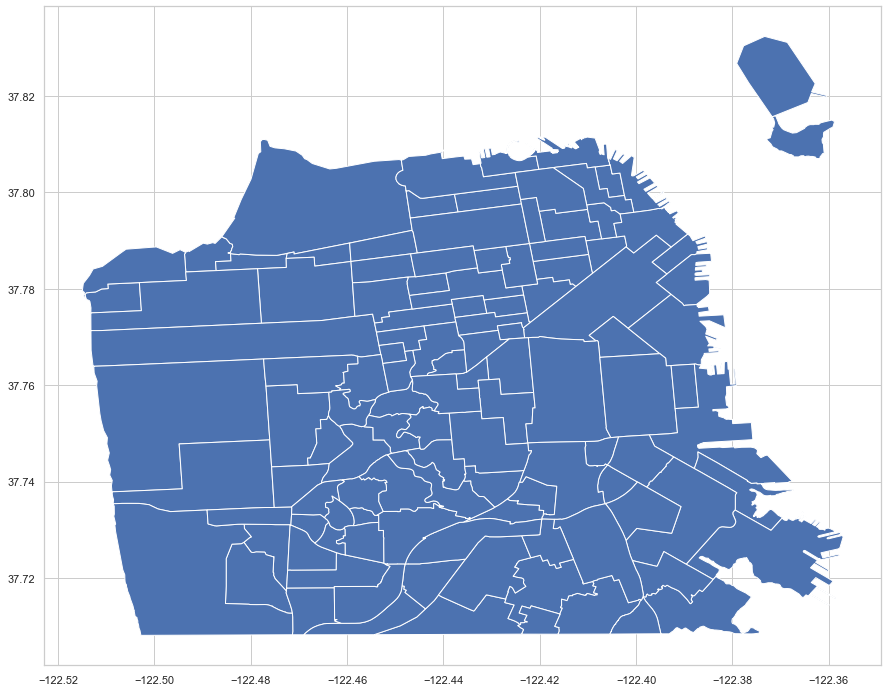

In [48]:
#Plot our shape file
fig,ax = plt.subplots(figsize = (15,15))
sanfran_map.plot(ax = ax);

In [49]:
#read in some training data run a loop to Populate another column for our geometry library. 
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(sanfran_df["start_station_longitude"], sanfran_df["start_station_latitude"])]

sanfran_df = gdp.GeoDataFrame(sanfran_df,#Specify our data
                                #crs = crs,#specify our coordinate reference system
                                geometry = geometry)#Specify the geometry list we created

sanfran_df

,start_station_id,start_station_longitude,start_station_latitude,geometry
0,368,-122.419622,37.785434,POINT (-122.4196216464043 37.78543382786823)
1,104,-122.390833,37.767045,POINT (-122.3908334970474 37.76704457969368)
2,49,-122.394989,37.780760,POINT (-122.3949894 37.7807601)
3,323,-122.405950,37.798014,POINT (-122.4059504270553 37.79801364395978)
4,5,-122.408445,37.783899,POINT (-122.4084448814392 37.78389935708493)
...,...,...,...,...
171,361,-122.385655,37.739853,POINT (-122.3856554925442 37.73985301798412)
172,359,-122.398963,37.730168,POINT (-122.3989632725716 37.73016750815088)
173,413,-122.447723,37.720555,POINT (-122.4477231502533 37.72055498872064)
174,344,-122.396292,37.766349,POINT (-122.3962917923927 37.76634858593739)


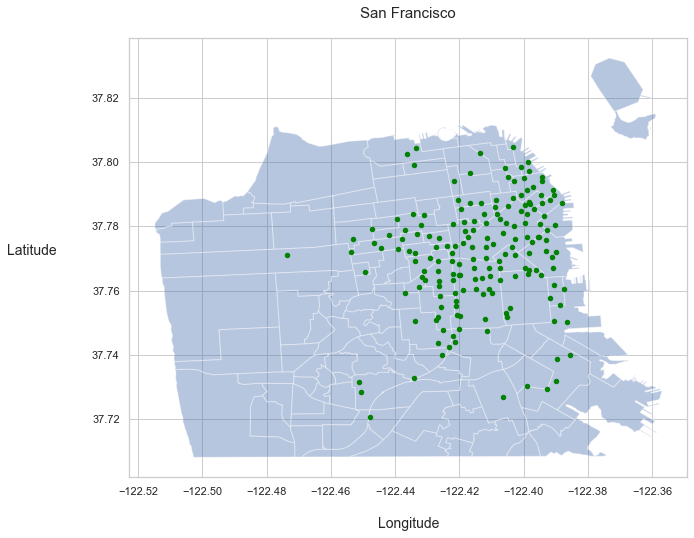

In [50]:
def sanfran_shape():
    
    #Plot our data
    fig,ax = plt.subplots(figsize = (10,10))
    sanfran_map.plot(ax = ax, alpha = 0.4)
    sanfran_df.plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "Start Station Mil",alpha=0.99)
    
    plt.xlabel('Longitude',rotation=0,fontsize=14,labelpad=20)
    plt.ylabel('Latitude',rotation=0,fontsize=14,labelpad=60)
    plt.title('San Francisco',fontsize=15,pad=20)
    return plt.show()

sanfran_shape()
    

<p><strong>Observation:</strong></p>
<ul>
<li>It looks as though most stations are to the east of center.</li>
<li>Stations are highly concentrated.</li>
</ul>

<p><strong>Question:</strong></p>
<ul>
<li>What does Oakland look like when you plot the stations?</li>
</ul>

In [51]:
#Query our data coordinates within Oakland boundaries.
con = sqlite3.connect("bikeshare.db")
oakland_df = sql.read_sql('SELECT DISTINCT start_station_id, start_station_longitude, start_station_latitude from bike_share where start_station_longitude between -122.35 and -122.10 and start_station_longitude like "-122%"', con)
oakland_df

,start_station_id,start_station_longitude,start_station_latitude
0,249,-122.253253,37.858473
1,160,-122.294837,37.805318
2,259,-122.299371,37.866249
3,243,-122.254337,37.869360
4,267,-122.253569,37.861804
...,...,...,...
123,174,-122.264004,37.836801
124,170,-122.261351,37.844493
125,234,-122.225400,37.778058
126,228,-122.217728,37.779930


In [52]:
#Import our shape file
streetmap = gdp.read_file('shape/oakland/geo_export_a8aad267-4123-4b77-b2b3-58eea2d8c754.shp')

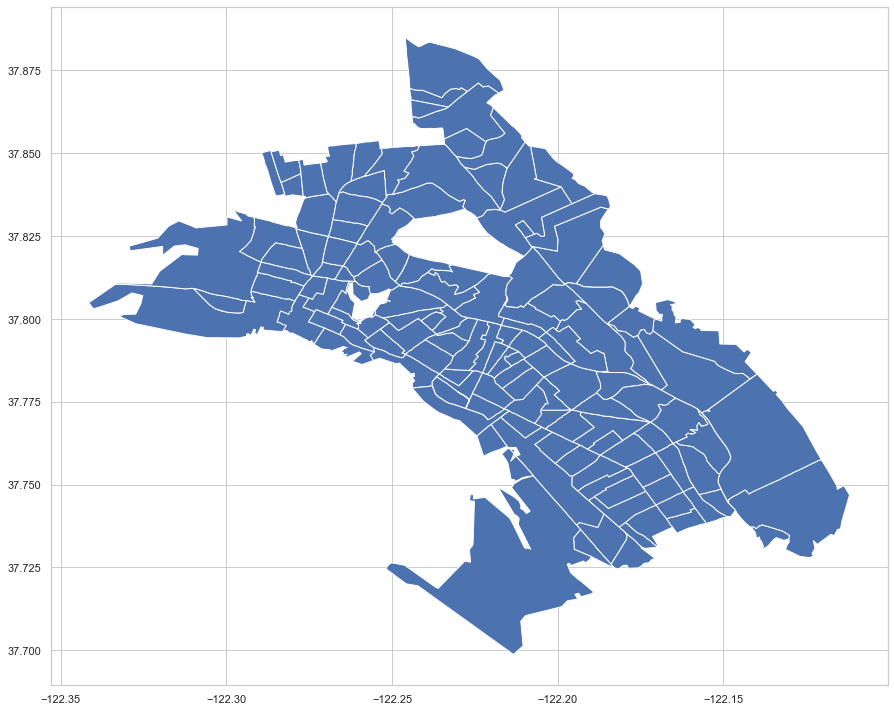

In [53]:
#Plot our shape file
fig,ax = plt.subplots(figsize = (15,15))
streetmap.plot(ax = ax);

In [54]:
#read in some training data run a loop to Populate another column for our geometry library. 
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(oakland_df["start_station_longitude"], oakland_df["start_station_latitude"])]

oakland_df = gdp.GeoDataFrame(oakland_df,#Specify our data
                                #crs = crs,#specify our coordinate reference system
                                geometry = geometry)#Specify the geometry list we created

oakland_df

,start_station_id,start_station_longitude,start_station_latitude,geometry
0,249,-122.253253,37.858473,POINT (-122.2532529 37.8584732)
1,160,-122.294837,37.805318,POINT (-122.2948365 37.8053183)
2,259,-122.299371,37.866249,POINT (-122.2993708 37.866249)
3,243,-122.254337,37.869360,POINT (-122.2543374 37.8693603)
4,267,-122.253569,37.861804,POINT (-122.2535687 37.8618037)
...,...,...,...,...
123,174,-122.264004,37.836801,POINT (-122.2640037 37.8368013)
124,170,-122.261351,37.844493,POINT (-122.261351 37.8444927)
125,234,-122.225400,37.778058,POINT (-122.2254 37.778058)
126,228,-122.217728,37.779930,POINT (-122.2177284 37.77993)


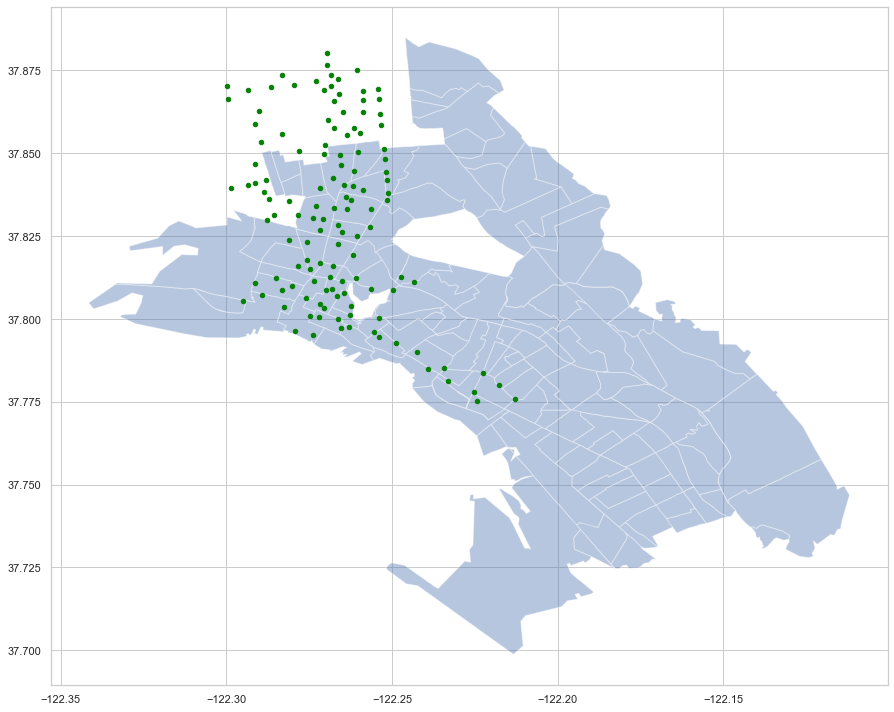

In [55]:
#Plot our data
fig,ax = plt.subplots(figsize = (15,15))
streetmap.plot(ax = ax, alpha = 0.4)

oakland_df.plot(ax = ax, markersize = 20, color = "green", marker = "o", label = "Start Station Mil",alpha=0.99);

<p><strong>Observations:</strong></p>
<p>We&rsquo;ve run into a bit of a problem.</p>
<ul>
<li>There are a few cities surrounding Oakland with Start Stations.</li>
<li>Finding it difficult to locate a shape files for that specific region.</li>
<li>Is there another way?</li>
</ul>

### Fortunately there is a library that connects with the Google Maps API.

In [56]:
#Query our data for Oakland and surrounding area
con = sqlite3.connect("bikeshare.db")
oakland_df = sql.read_sql('SELECT distinct start_station_id, start_station_latitude, start_station_longitude from bike_share where start_station_longitude between -122.35 and -122.15 ', con)
oakland_df

,start_station_id,start_station_latitude,start_station_longitude
0,249,37.858473,-122.253253
1,160,37.805318,-122.294837
2,259,37.866249,-122.299371
3,243,37.869360,-122.254337
4,267,37.861804,-122.253569
...,...,...,...
123,174,37.836801,-122.264004
124,170,37.844493,-122.261351
125,234,37.778058,-122.225400
126,228,37.779930,-122.217728


In [57]:
#Slice the geo data
oakland_df_geo = oakland_df[['start_station_latitude','start_station_longitude']]
oakland_df_geo

,start_station_latitude,start_station_longitude
0,37.858473,-122.253253
1,37.805318,-122.294837
2,37.866249,-122.299371
3,37.869360,-122.254337
4,37.861804,-122.253569
...,...,...
123,37.836801,-122.264004
124,37.844493,-122.261351
125,37.778058,-122.225400
126,37.779930,-122.217728


In [58]:
#use gmaps with my api key to create a map.
gmaps.configure(api_key='secret')

#plot our data
locations = oakland_df_geo
fig = gmaps.figure(map_type='ROADMAP')
scatter_locations = gmaps.symbol_layer(locations,fill_color = "#2A65B1",stroke_color="#2A65B1",scale=2)
fig.add_layer(scatter_locations)
fig

Figure(layout=FigureLayout(height='420px'))

<p><strong>Observations:</strong></p>
<ul>
<li>Using gmaps is much more efficient for this application.</li>
<li>We notice there are quite a few cities in the bay area that have excluded themselves from the program.</li>
</ul>

<p><strong>Question:</strong></p>
<ul>
<li>Where are the most popular start stations? (Top 10)</li>
<li>Where are the least popular start stations? (Top 10)</li>
</ul>

In [59]:
#Query our data to find the most popular and least popular start stations.
station = sql.read_sql('SELECT start_station_latitude, start_station_longitude, start_station_name,  COUNT(start_station_name) as count FROM bike_share WHERE start_station_name !="" GROUP BY start_station_name ORDER BY COUNT(start_station_name) DESC', con)
pop_station = station.head(10)
unpop_station = station.tail(10)

In [60]:
#top 10 popular stations
pop_station

,start_station_latitude,start_station_longitude,start_station_name,count
0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,5196
1,37.775880,-122.393170,Berry St at 4th St,4156
2,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,3714
3,37.776619,-122.417385,Market St at 10th St,3543
4,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),3092
5,37.794130,-122.394430,Steuart St at Market St,3063
6,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),3009
7,37.789756,-122.394643,Howard St at Beale St,2744
8,37.804770,-122.403234,The Embarcadero at Sansome St,2671
9,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2582


In [61]:
#Slice the data
pop_station_geo = pop_station[['start_station_latitude','start_station_longitude']]
pop_station_geo

,start_station_latitude,start_station_longitude
0,37.776639,-122.395526
1,37.775880,-122.393170
2,37.795392,-122.394203
3,37.776619,-122.417385
4,37.789625,-122.400811
5,37.794130,-122.394430
6,37.786375,-122.404904
7,37.789756,-122.394643
8,37.804770,-122.403234
9,37.783899,-122.408445


In [62]:
#use gmaps with my api key to create a map.
gmaps.configure(api_key='secret')

locations = pop_station_geo
fig = gmaps.figure(map_type='ROADMAP')
scatter_locations = gmaps.symbol_layer(locations,fill_color = "#2A65B1",stroke_color="#2A65B1",scale=2)
fig.add_layer(scatter_locations)
fig

Figure(layout=FigureLayout(height='420px'))

<p><strong>Observations:</strong></p>
<ul>
<li>Our top 10 most used stations are all in San Francisco.</li>
<li>A large majority are on Market St.</li>
</ul>

<p><strong>Question:</strong></p>
<ul>
<li>What start station is used the most according to our data?</li>
</ul>

In [63]:
#Slice our number one start station.
most_pop = pop_station_geo[0:1]
most_pop

,start_station_latitude,start_station_longitude
0,37.776639,-122.395526


In [64]:
#use gmaps with my api key to create a map.
gmaps.configure(api_key='secret')

locations = most_pop
fig = gmaps.figure(map_type='SATELLITE')
scatter_locations = gmaps.symbol_layer(locations,fill_color = "#FBFF02",stroke_color="#FBFF02",scale=5)
fig.add_layer(scatter_locations)
fig

Figure(layout=FigureLayout(height='420px'))

<p><strong>Observations:</strong></p>
<ul>
<li>Our most frequented start station is on Townsend St</li>
<li>This makes a lot of sense, there is a very busy train station right beside the bike station.</li>
</ul>

<p><strong>Question:</strong></p>
<ul>
<li>Where are our least popular start location?</li>
<li>What is the least popular start station?</li>
</ul>

In [65]:
unpop_station_geo = unpop_station[['start_station_latitude','start_station_longitude']]
unpop_station_geo

,start_station_latitude,start_station_longitude
367,37.315158,-121.897833
368,37.778058,-122.225400
369,37.336775,-121.909149
370,37.345759,-121.870678
371,37.360001,-121.878778
372,37.753123,-122.405393
373,37.355030,-121.904436
374,37.784855,-122.239305
375,45.510000,-73.570000
376,37.766349,-122.396292


In [66]:
#use gmaps with my api key to create a map.
gmaps.configure(api_key='secret')

locations = unpop_station_geo
fig = gmaps.figure(map_type='ROADMAP')
scatter_locations = gmaps.symbol_layer(locations,fill_color = "#2A65B1",stroke_color="#2A65B1",scale=2)
fig.add_layer(scatter_locations)
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
#Slice our least popular start station
least_pop = unpop_station_geo[9:10]
least_pop

,start_station_latitude,start_station_longitude
376,37.766349,-122.396292


In [68]:
#use gmaps with my api key to create a map.
gmaps.configure(api_key='secret')

locations = least_pop
fig = gmaps.figure(map_type='ROADMAP')
scatter_locations = gmaps.symbol_layer(locations,fill_color = "#FBFF02",stroke_color="#FBFF02",scale=5)
fig.add_layer(scatter_locations)
fig

Figure(layout=FigureLayout(height='420px'))

###### <p><strong>Observations:</strong></p>
<ul>
<li>Of the top 10 least used start stations San Jose has the most.</li>
<li>The station used the least is located on 16th St San Francisco </li>
<li>There is a station in Canada.</li>
</ul>

## That’s odd why is there a station in Canada?

In [69]:
#Slice our station located in canada
mont = unpop_station_geo[8:9]
mont

,start_station_latitude,start_station_longitude
375,45.51,-73.57


In [70]:
#use gmaps with my api key to create a map.
gmaps.configure(api_key='secret')

locations = mont
fig = gmaps.figure(map_type='ROADMAP')
scatter_locations = gmaps.symbol_layer(locations,fill_color = "#FBFF02",stroke_color="#FBFF02",scale=5)
fig.add_layer(scatter_locations)
fig

Figure(layout=FigureLayout(height='420px'))

<p><strong>Observations:</strong></p>
<ul>
<li>There is a station in Montreal Canada.</li>
<li>The station in Montreal Canada is the least popular station.</li>
<li>You never know what you&rsquo;ll find in the data.</li>
</ul>

<p>Resources</p>
<ul>
<li><a href="https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972">Using shape files for plotting.</a></li>
<li><a href="https://www.geeksforgeeks.org/python-plotting-google-map-using-gmplot-package/">GMPLOT</a></li>
<li><a href="https://pypi.org/project/gmaps/">GMAPS</a></li>
<li><a href="https://wesmckinney.com/pages/book.html">Python for data analysis</a></li>
</ul>